# Работа 2.2/2.3

## Изучение спктров атомов водорода. Изучение молекулярного спектра йода.

### Цель работы: исследование спетральных закономерности в оптических спектрах водорода. Вычисление постоянных Ридберга для водорода. Исследование спектров поглощения паров йода в видимой области; вычисление энергии колебательного кванта молекулы йода и энергия ее диссоциации в онсовных и возбужденных состояниях. 

### I. Теория

Для атома водорода и водородоподобных атомов определение энергитических уровней значительно упрощается и сводится к задаче об относительном движении электрона и ядра с эффективной массой $\mu = m_eM/(m_e + M)$ в кулоновском поле $-Ze^2/r$. Длины волн спектральных линий водороподобных атома описываются формулой: $$\cfrac{1}{\lambda_{mn}} = R Z^2 \left( \cfrac{1}{n^2} - \cfrac{1}{m^2} \right), \tag{1}$$ где $R$-постоянная Ридберга, а $m$ и $n$ - целые числа. 

**Постулаты Бора**:
1. В атоме для электронов существуют только некотрые стационарные орбиты, при движении по которым электрон не излучает энергии.
2. В атоме осуществляют только те, для которых момент количества движения равен целому кратному величины постоянной Планка $\hbar = h/(2\pi)$ т. е. $$L = n\hbar; \tag{2}$$
3. Излучение или поглощение энергии происходит при переходе атома з одного стационарного состояния в другое, а частота излучения света связана с разностью энергий атома в стационраных состояниях: $$h\nu = E_2 - E_1 \tag{3}$$
Если считать ядро неподвижным, то эти энергитические состояния определяются выражением: $$E_n = -\cfrac{2\pi^2m_ee^4Z^2}{h^2}\cfrac{1}{n^2}. \tag{4}$$
<img src="Selection_055.png" width=250>
В данной работе изучается серия Бальмера, линии которой лежат в видимой области. Для серии Бальмера $n = 2$. Величина $m$ для первых четырех линий этой серии принимает значение 3, 4, 5, 6. Эти линии обозначаются символами $H_\alpha$, $H_\beta$, $H_\gamma$, $H_\delta$. 
Полная энергия электрона в кулоновском поле ядра определяется выражением: $$E = -\cfrac{Ze^2}{r} + \cfrac{\hbar^2}{2m_er^2}. \tag{5}$$
Диффиренцирование этого выражения по $r$ приводит к следующему условию для минимального значения энергии: $$\cfrac{Ze^2}{r^2} - \cfrac{\hbar^2}{m_er^3} = 0, \tag{6}$$ $$r_б = \cfrac{\hbar^2}{Zm_ee^2}.$$
Итак мы получили значение боровского радиуса для электрона в поле ядра $Z$. Отсюда из (7) в (5): $$E = -\cfrac{m_ee^4}{2\hbar^2}Z^2 = -RZ^2. \tag{8}$$
Аналогичным образом могут быть найдены энергии возбужденных состояний. На длине обиты должно укладываться целое число волн де Бройля. Если радиус орбиты $r$, то $n$-му состоянию электрона соответсвует условие $$2\pi r = \lambda n\;(n = 1, 2, 3, \dots),\; или \; m_ev_n = \cfrac{nh}{2\pi r}. \tag{9}$$
Аналогично выведенной формуле (7) для боровского радиуса состояния с квантовым числом $n$ мы получаем: $$r_n = \cfrac{n^2\hbar^2}{Zm_ee^2}, \tag{10}$$ а энергия $$E_n = -\cfrac{m_eZ^2e^4}{2\hbar^2}\cfrac{1}{n^2} = -R\cfrac{Z^2}{n^2}. \tag{11}$$

---
### II. Экспериментальная установка и выполнение работы
**Схема установки для измерения длин волн серии Бальмера**
<img src="Selection_056.png" width=550>
**Схема установки для измерений линий поглощения йода**
<img src="Selection_057.png" width=550>

---
### III. Выполнение работы
**1** Снимем градуировку шкалы и построим калибровочный графки по спектру неоновой лампы и ртутной:

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [28]:
class interpolate:
    def __init__(self, x, b):
        A = x.reshape(x.size, 1)
        ones = np.ones(A.shape[0]).reshape(A.shape[0], 1)
        A = np.hstack((A, ones))
        t = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)
        self.k = t[0]
        self.x_0 = t[1]
        self.zero = -t[1] / t[0]
    def __call__(self, x):
        return self.k * x + self.x_0
    
class polinom_interpolate:
    def __init__(self, x, y, n):
        A = np.vander(x, n + 1, increasing=True)
        self.k = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ y)
        self.n = n
    def __call__(self, x):
        if(type(x) != np.ndarray):
            x = np.array([x])
            A = np.vander(x, self.n + 1, increasing=True)
            solution = A @ self.k 
            return solution[0]
        A = np.vander(x, self.n + 1, increasing=True)
        return A @ self.k

   Длина волны, А  Показания барабана
0            6929                2568
1            6533                2428
2            6305                2338
3            6030                2230
4            5852                2140
5            5341                1854
6            4916                1492
7            4358                 822
8            4047                 260


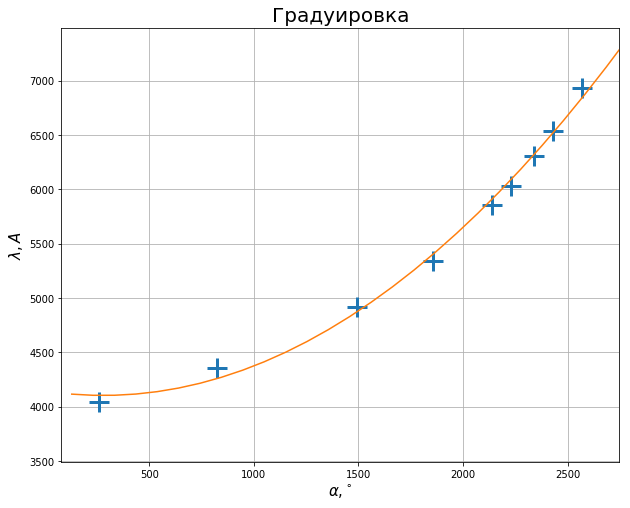

In [29]:
data = pd.read_csv("Градуировка.csv")
print(data)
data = data.values
graduate = polinom_interpolate(data[:,1], data[:,0], 3)
plt.figure(figsize=(10, 8))
plt.title("Градуировка", fontsize=20)
plt.plot(data[:,1], data[:,0], '+', markersize=20, markeredgewidth=3)

grid = np.linspace((1/2)*data[:,1].min(), 2 * data[:,1].max())
plt.plot(grid, graduate(grid))
plt.xlabel(r"$\alpha, ^{\circ}$", fontsize=15)
plt.ylabel(r"$\lambda, A$", fontsize=15)
delta_x = data[:,1].mean() / 10
plt.xlim(data[:,1].min() - delta_x, data[:,1].max() + delta_x)
delta_y = data[:,0].mean() / 10
plt.ylim(data[:,0].min() - delta_y, data[:,0].max() + delta_y)
plt.grid()

<br>
<br>
2. По градуировочному графику определим длины волн линий водорода: $H_{\alpha}$, $H_{\beta}$, $H_{\gamma}$, $H_{\delta}$:

Получаем, отсюда что 1-ая линия = 656 нм
Получаем, отсюда что 2-ая линия = 480 нм
Получаем, отсюда что 3-ая линия = 423 нм


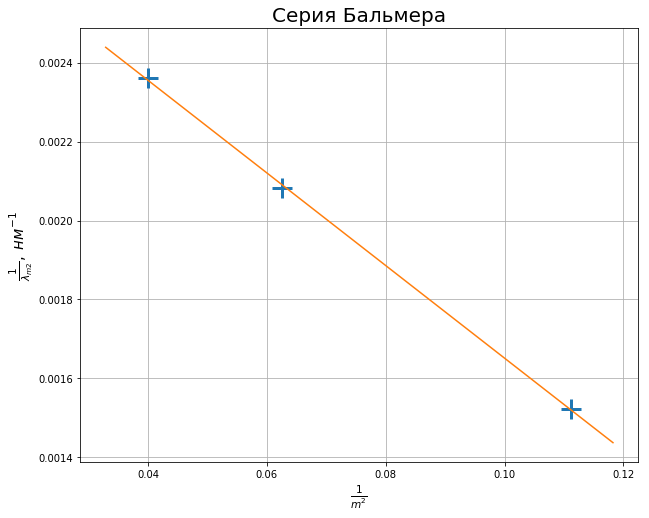

Отсюда получаем, что постоянная Ридберга равна: 117426


In [30]:
H_wavelengths = np.array([2450, 1434, 780])
for i in range(H_wavelengths.size):
    print("Получаем, отсюда что {}-ая линия = {} нм".format(i + 1, int(graduate(H_wavelengths[i]) / 10)))
H_wavelengths = graduate(H_wavelengths) / 10
m = np.array([3, 4, 5])
y = 1 / H_wavelengths
x = 1 / m**2
f = interpolate(x, y)
delta_x = x.mean() / 10
grid = np.linspace(x.min() - delta_x , x.max() + delta_x)
plt.figure(figsize=(10, 8))
plt.title("Серия Бальмера", fontsize=20)
plt.plot(x, y, '+', markersize=20, markeredgewidth=3)
plt.plot(grid, f(grid))
plt.xlabel(r"$\frac{1}{m^2}$", fontsize=15)
plt.ylabel(r"$\frac{1}{\lambda_{m2}},\: нм^{-1}$", fontsize=15)
plt.grid()
plt.show()
print("Отсюда получаем, что постоянная Ридберга равна: {:g}".format(-f.k*1e7))

Итак, получаем что $R_э=117426\;см^{-1}$, $R_т = 109677.6\;см^{-1}$ примерно сходятся. 

Построим линии поглощения йода:

   Номер линии поглощения  Показания барабана
0                       1                2220
1                       5                2196
2                       8                2110
3                      11                2060
4                      14                1990
5                      17                1960
6                      21                1906
7                      24                1850
8                      27                1803


---------------------------------------------------------------------------
Номер линии поглощения	Длина волны, нм
1			607
5			602
8			585
11			576
14			563
17			557
21			548
24			539
27			531


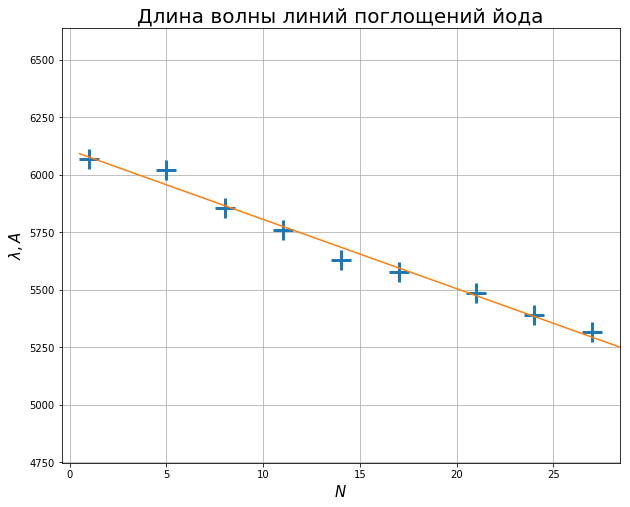

In [31]:
data = pd.read_csv("Линии_поглощения.csv")
print(data)
data = data.values
data[:,1] = graduate(data[:,1])
print('\n')
print('---------------------------------------------------------------------------')
print("Номер линии поглощения\tДлина волны, нм")
for i in range(data.shape[0]):
    print("{}\t\t\t{}".format(data[i][0], int(data[i][1] / 10)))
f = interpolate(data[:,0], data[:,1])
plt.figure(figsize=(10, 8))
plt.title("Длина волны линий поглощений йода", fontsize=20)
plt.plot(data[:,0], data[:,1], '+', markersize=20, markeredgewidth=3)

grid = np.linspace((1/2)*data[:,0].min(), 2 * data[:,0].max())
plt.plot(grid, f(grid))
plt.xlabel(r"$N$", fontsize=15)
plt.ylabel(r"$\lambda, A$", fontsize=15)
delta_x = data[:,0].mean() / 10
plt.xlim(data[:,0].min() - delta_x, data[:,0].max() + delta_x)
delta_y = data[:,1].mean() / 10
plt.ylim(data[:,1].min() - delta_y, data[:,1].max() + delta_y)
plt.grid()

Получаем, что энергия колебательного кванта возбужденного состояния молеклы йода состовляет: $h\nu_2 = 2.0$ мэВ

Также в работе определялась спектральная чувствиельность глаза, которая получилась $\lambda_л = 712 \:нм$, $\lambda_п = 410\:нм$.